In [8]:
# Python packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [9]:
# Loading dataset
df = pd.read_csv("E:/PremiumPrediction/notebook/data/insurance.csv")

In [10]:
# Displaying dataset
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [11]:
# Duplicate value

df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [12]:
# Shape of dataset

df.shape   

(1338, 7)

In [13]:
# Top 5 records of the dataset

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [14]:
# Converting categorical variable into numerical variable

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['sex']= encoder.fit_transform(df['sex'])
df['smoker']= encoder.fit_transform(df['smoker'])
df['region']= encoder.fit_transform(df['region'])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


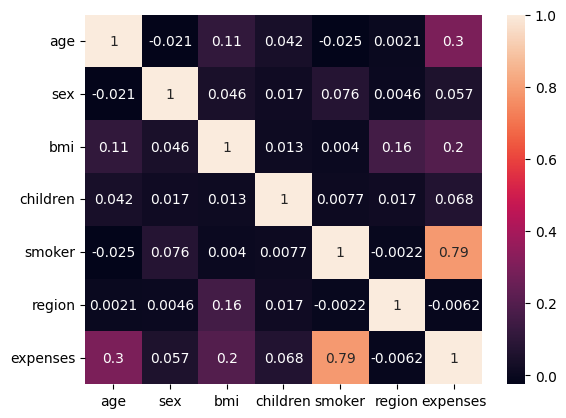

In [17]:
# correlation

sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
sns.pairplot(df,hue='sex')
plt.show()

e:\PremiumPrediction\venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\PremiumPrediction\venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\PremiumPrediction\venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\PremiumPrediction\venv\lib\site-packages\seaborn\_base.py:949: Futu

In [ ]:
# Splitting Data into Independent and Dependent Variable

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [ ]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [ ]:
x.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train.shape

(896, 6)

In [ ]:
x_test.shape

(442, 6)

In [ ]:
y_train.shape

(896,)

In [ ]:
y_test.shape

(442,)

In [ ]:
# ENCODING THE CATEGORICAL DATA
# encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [ ]:
x = df.drop(columns='expenses', axis=1)
y = df['expenses']

In [ ]:
print(x)

      age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       3
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       1
4      32    1  28.9         0       0       1
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       1
1334   18    0  31.9         0       0       0
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       3
1337   61    0  29.1         0       1       1

[1338 rows x 6 columns]


In [ ]:
print(y)


0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Create an Evaluate Function to give all metrics after model Training

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6008.4598
- Mean Absolute Error: 4139.7668
- R2 Score: 0.7520
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6193.8790
- Mean Absolute Error: 4285.6043
- R2 Score: 0.7445


Lasso
Model performance for Training set
- Root Mean Squared Error: 6008.4608
- Mean Absolute Error: 4140.2357
- R2 Score: 0.7520
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6193.8397
- Mean Absolute Error: 4285.4661
- R2 Score: 0.7446


Ridge
Model performance for Training set
- Root Mean Squared Error: 6008.7134
- Mean Absolute Error: 4150.6565
- R2 Score: 0.7520
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6192.5746
- Mean Absolute Error: 4291.3034
- R2 Score: 0.7447


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9316.8662
- Mean Absolute Error: 6311.2009


RESULTS

In [ ]:

"pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=[\"R2_Score\"],ascending=False)"

'pd.DataFrame(list(zip(model_list, r2_list)), columns=[\'Model Name\', \'R2_Score\']).sort_values(by=["R2_Score"],ascending=False)'

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 74.45


# Plot y_pred and y_test

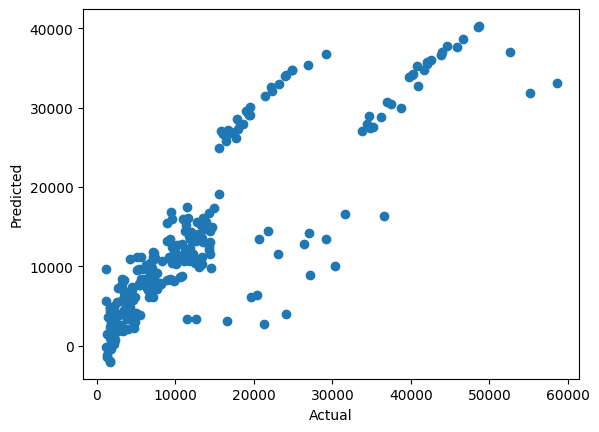

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

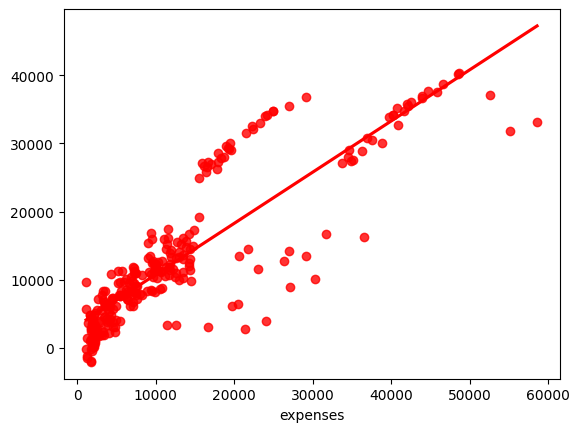

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
17,2395.17,1869.929561,525.240439
1091,11286.54,11934.027500,-647.487500
273,9617.66,10469.923678,-852.263678
270,1719.44,2407.687566,-688.247566
874,8891.14,8287.595472,603.544528
...,...,...,...
232,1727.79,-2055.845263,3783.635263
323,11566.30,16073.319975,-4507.019975
1337,29141.36,36791.646271,-7650.286271
1066,8978.19,13151.243676,-4173.053676
